# 3. Ensemble Learning

## (1) Ensemble Learning 정의

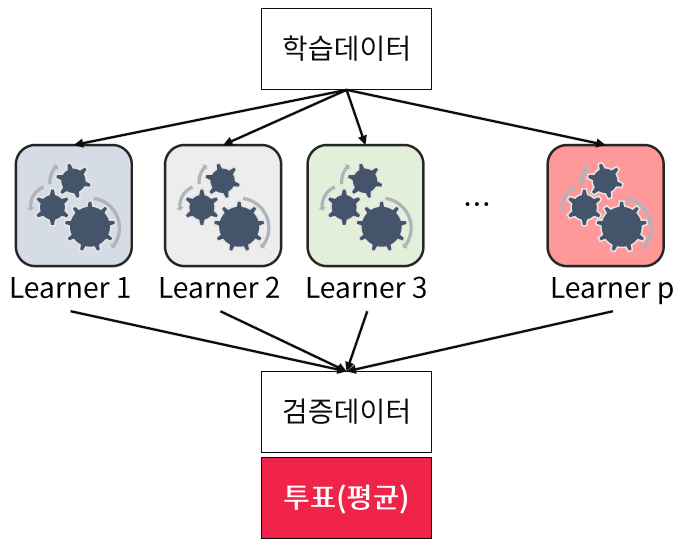

* **Ensemble Learning**  
    - 여러 개의 <u>기본 모델</u>을 활용하여 하나의 새로운 모델을 만들어내는 개념  
    - 이때 기본모델은 weak learner, classifier, base learner, single learner라고 부름  
    - 다양항 learner를 만들면 전체의 모델 성능을 높힐 수 있다  
    - 여러개의 Model에 학습데이터를 넣고, 거기에서 나온 결과를 평균 혹은 투표를 해서 결과 예측  
    - Test 데이터에 대해 다양한 예측값을 수렴하기 위해 overfitting이 잘 되는 모델을 기본적으로 사용  
     =>그래서 Tree Model을 사용하였고, 앙상블 모델은 Tree기반으로 발전  
    - Random Forest, Boosting 도 Tree 기반 모델, 하지만 Tree가 아닌 다른 모델을 사용해도 무방

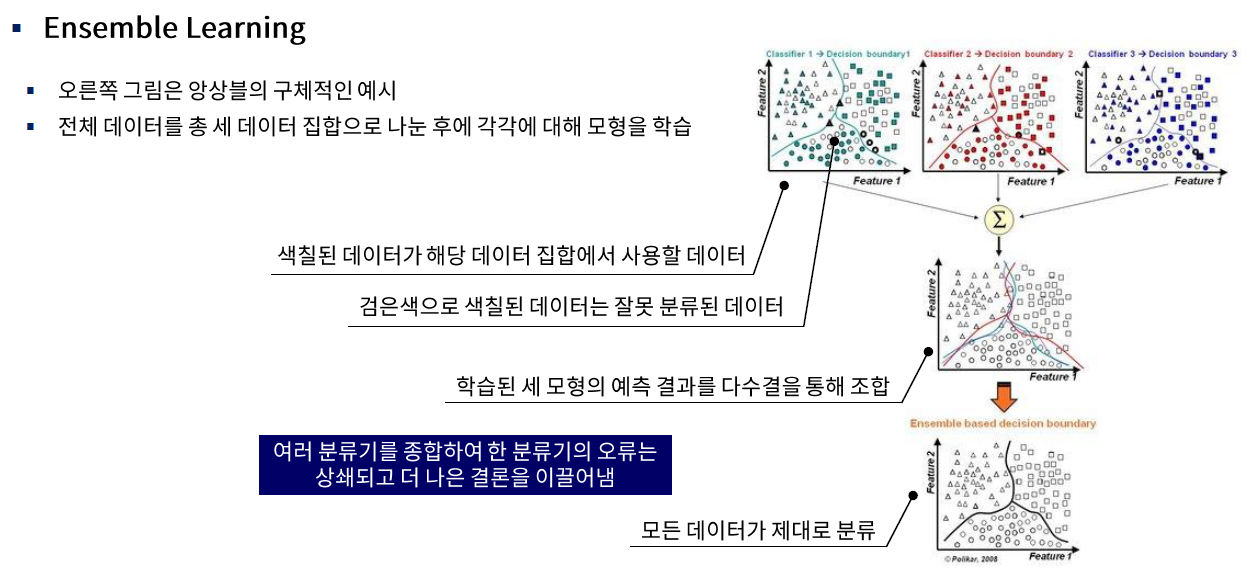

## (2) Ensenble Learning 종류

* ### Bagging  
    - 모델을 다양하게 만들기 위해 <u>데이터를 재구성</u>
    - Base Learner들이 독립적
* ### RandomForest  
    - 모델을 다양하게 만들기 위해 <u>데이터(행) 뿐만 아니라 변수(열)도 재구성</u>  
    - Base Learner들이 독립적
* ### Boosting  
    - 맞추기 어려운 데이터에 대해 좀더 <u>가중치를 두어 학습</u>
    - Adaboost, Gradient boosting(Xgboost,LightGBM,Catboost)  
    - Base Learner들이 독립적이지 않고, 연속적으로 되어 있다.

## (3) Bagging

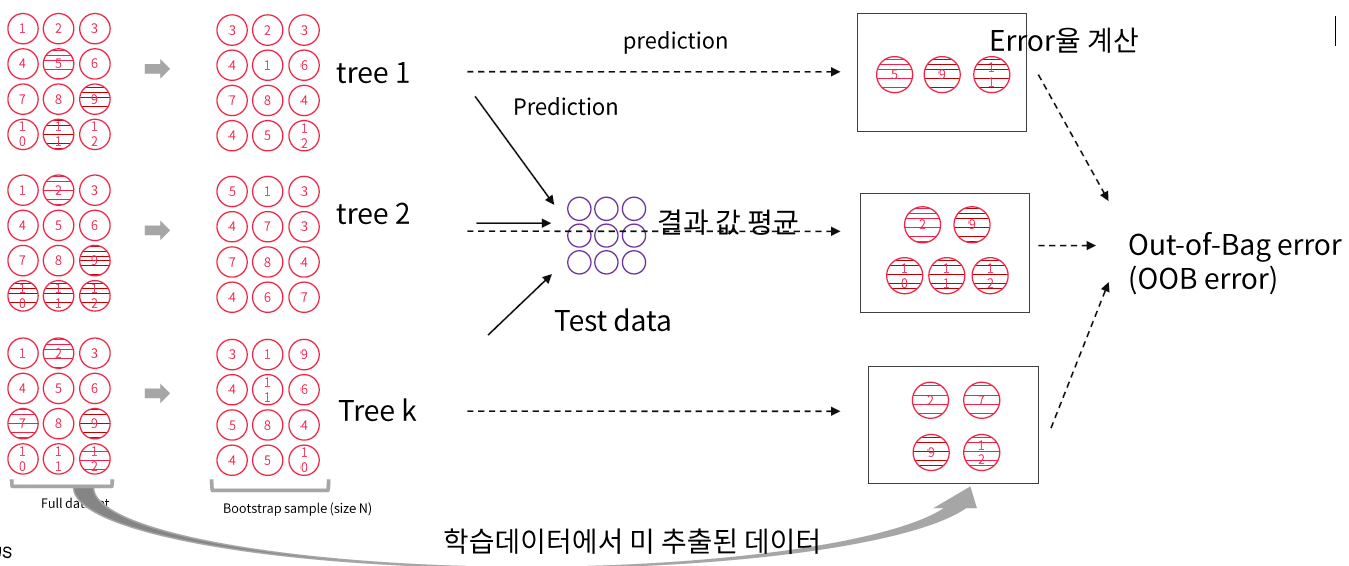

* ### Bootstrapping  
    - 복원추출의 개념 -> 뽑고 확인 한 후 다시 넣고 다시 뽑는다
    - Bootstrap sample에 중복해서 뽑힌 데이터도 있을 것이고, 안뽑힌 데이터도 있을 것  
* ### Bagging(bootstrap aggregating)
    - Bootstrap sample(Size N)의 의미는 N개의 Full dataset을 N번 복원추출 한다는 것  
    - Bootstrap sample로 Tree를 만들고 k번 반복하여 모델(k개의 모델 생성) 을 만들고, Test data로 Prediction하여 결과 값 평균을 구한다  
    - 학습 데이터에서 미추출 데이터를 가지고 각각의 Tree들이 Prediction한다 => Error를 내고 평균을 낸다 => OOB error가 나옴
    - OOB error => 학습 데이터를 뽑고 나서, 남은걸 검증 데이터로 쓰면 어떻겠냐 라는 생각에 이 개념을 고안  
        => OOB error를 가지고 검증 데이터에 대한 성능 지표를 계산 할 수 있음

* ### Tree vs Bagging  
    - 깊이 성장한 Tree : 분산 증가, 편향 감소, overfitting이 매우 높다
    - Bagging : 트리들의 편향 유지, 분산 감소/ 학습 데이터의 noise에 강해짐 -> 어떠한 데이터가 들어와도 예측 가능 / 모형 해석이 어려움

## (3) RandomForest

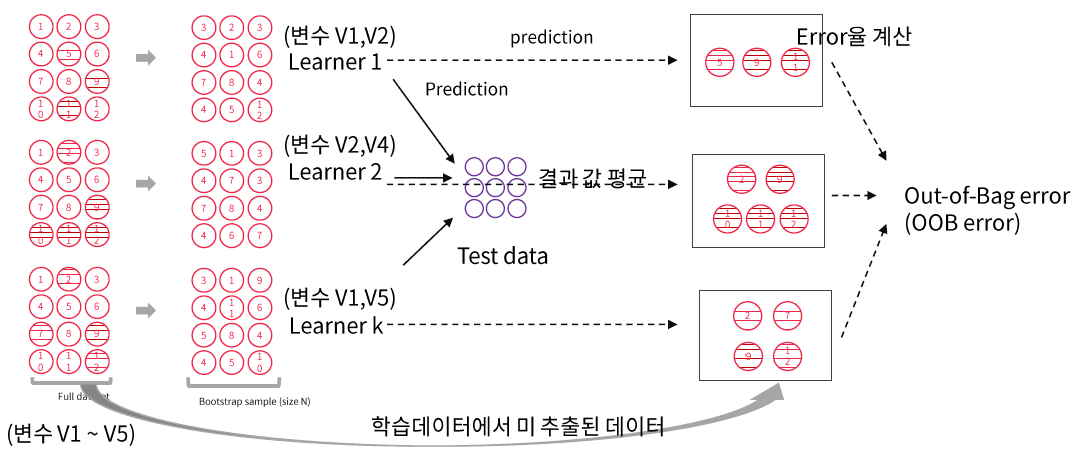

* ### RandomForest  
    - 데이터 뿐만이 아니라, 변수도 random하게 뽑아서 다양한 모델을 만들자 (base learner간의 공분산을 줄이자)  
       => RandomForest의 목적  
    - 뽑을 변수의 수는 hyper parameter -> 일반적으로 p에 루트를 취한 값으로 지정  
    - <u>모델의 분산을 줄이기 떄문에 일반적으로 Bagging보다 성능이 좋다</u>
    - Tree들이 서로 상관관계가 없도록 randomization => 분산이 작아지는 효과!!! 즉, 독립적이 Tree형성이 핵심!

## (4) Boosting

* ### Boosting 의미  
    - 오분류된 데이터에 초점을 맞추어 더 많은 가중치를 주는 방식
    - 초기에는 모든 데이터가 동일한 가중치를 가지지만, round가 종료된 후 가중치와 중요도를 계산
    - 복원추출 시, 가중치 분포를 고려!
    - 오분류된 데이터가 더 큰 가중치를 얻게 됨에 따라, 다음 round에 더 많이 고려됨
    - Boosting 기법으로 AdaBoost, Gradient Boost, etc....

* ### AdaBoost

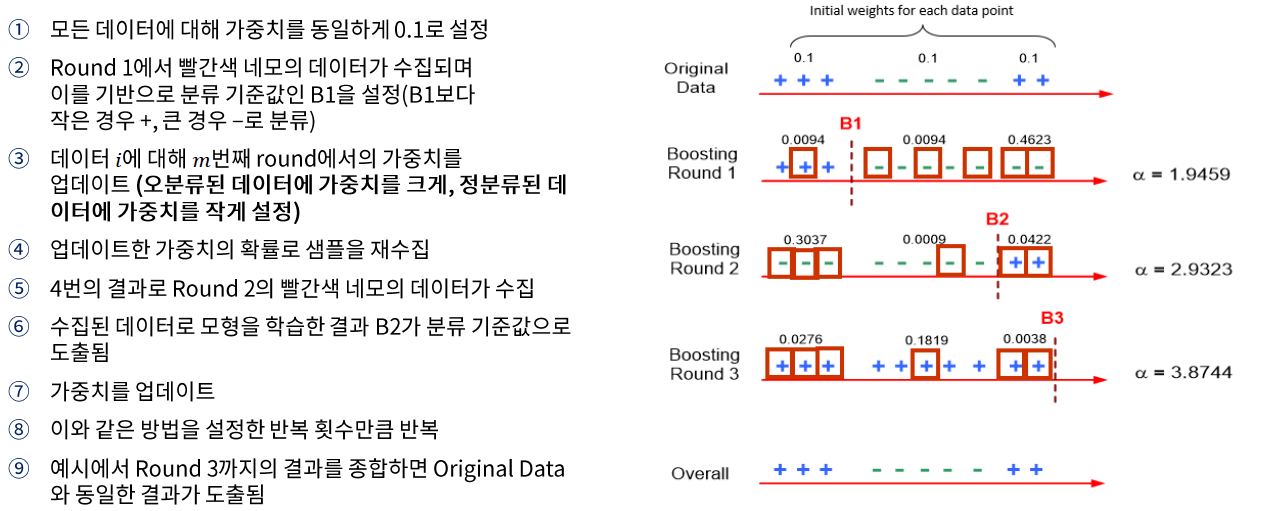

* AdaBoost의 최종 의사 결정 방법

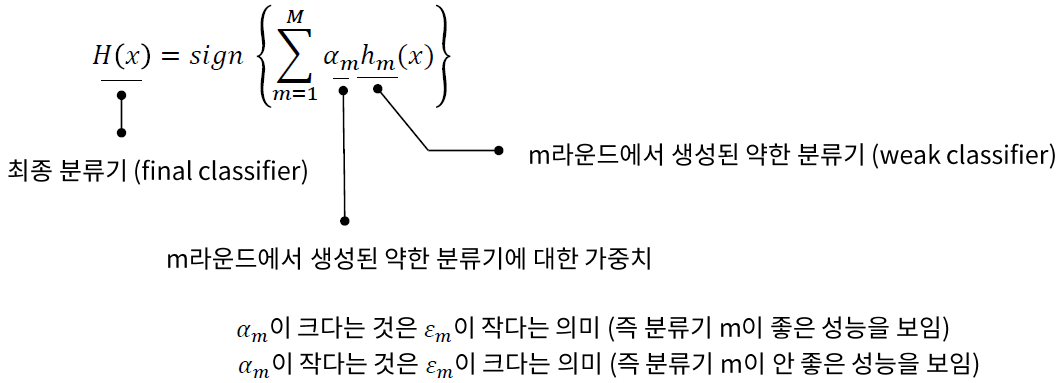

 - m번째 Round의 weak learner가 정확도가 높으면, 그 Learner는 가중치를 높게 두어서 써야하고,
   반대로 m번째 Round의 weak learner가 정확도가 낮으면, 그 가중치를 0에 가깝게 해서 쓸 수 없게끔 한다.

## (5) Gradient Boosting

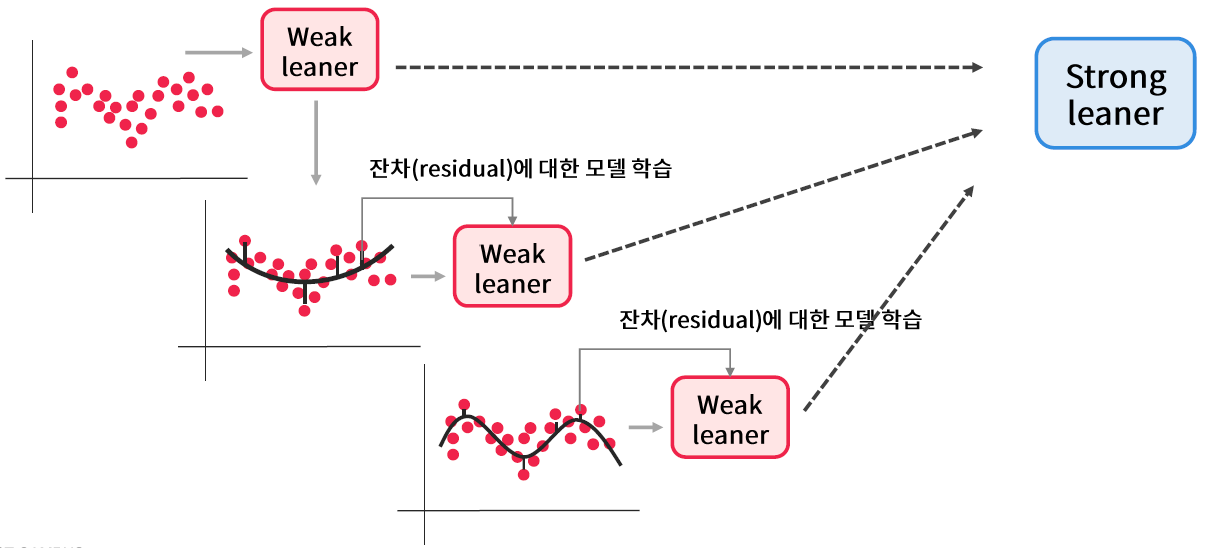

* ### Gradient Boosting 이란
    - AdaBoost는 오분류된 데이터에 더 큰 가중치를 두어 다음 Round 샘플링에 반영
    - Gradient Boosting은 이전 Round의 합성 분류기의 **데이터별 오류를 예측하는 새로운 weak learner를 학습**
    - x를 입력받아 y를 예측하는 모델 h0가 있다 가정 => y = h0(x) + error(오차)
    - Error가 예측 불가능 한 랜덤 노이즈가 아닌 경우, 예측 성능을 올리는 가장 직관적인 방법은 **error를 제거하는 것**
    - 그렇다면 어떻게 error를 제거? -> Gradient Boosting의 기본 개념  
    => error = h1(x) + error2 , 이때 h1(x)는 error(오차)를 예측하는 모델  
    => y = h0(x) + h1(x) + ... + small error  
    - residual(잔차)에 대해 계속 학습을 시키면 결국 오차가 줄어든다
    - residual(잔차)를 최소화 시키면서 학습 시키기 때문에 Gradient Boosting이라고 부른다!

## (6) Gradient Boosting 종류

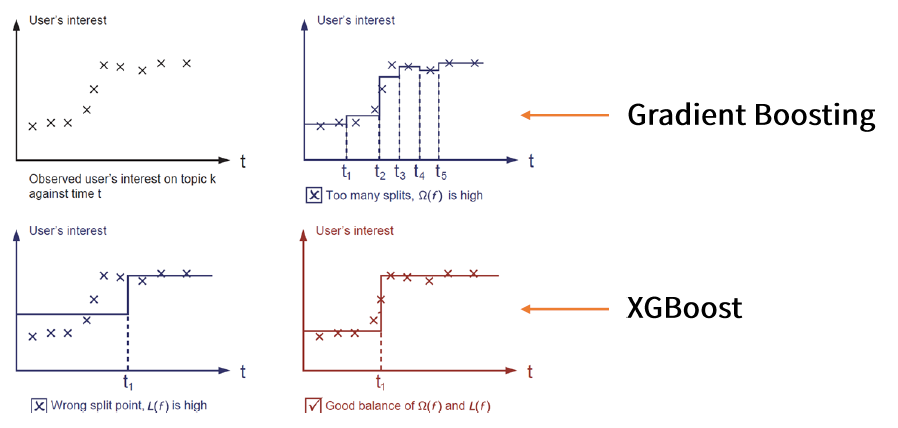  
* ### XGBoost  
    - XGBoost는 Gradient Boosting 개념을 **의사결정나무에 도입한 알고리즘**으로 <u>데이터 별 오류를 다음 Round 학습에 반영시킨다는 측면에서 기존 Gradient Boosting과 큰 차이는 없음</u>  
    - 다만, XGBoost는 Gradient Boosting과는 달리 학습을 위한 목적식에 Regularization term이 추가되어 모델이 overfitting(과적합) 되는 것을 방지해줌.
    - 위의 그림에서와 같이 Gradient Boosting은 오류를 최소화하기 위해 약학분류기를 너무 많이 학습할 위험이 있어, 과적합에 취약!
    - 하지만, XGBoost는 Simple하게 즉 평탄하게 만들어지며, overfitting을 방지할 수 있다

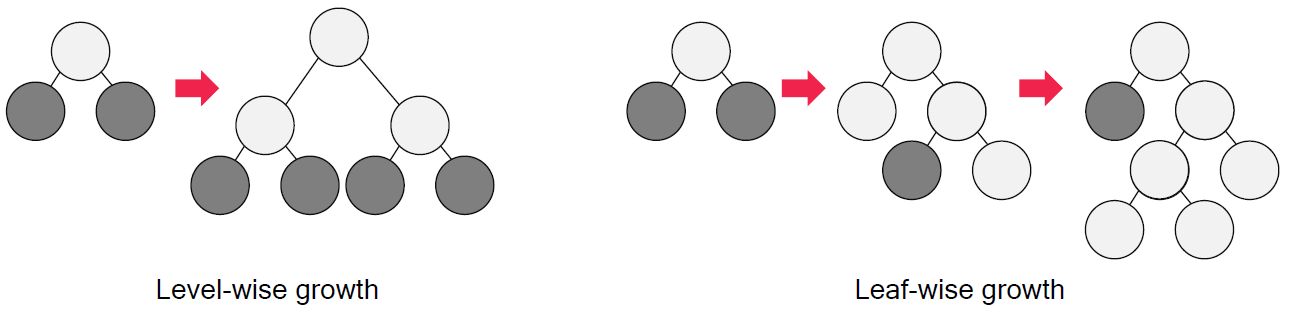  
* ### LightGBM  
    - XGBoost와 다르게 leaf-wise loss사용 -> loss를 더 줄일 수 있음  
    => XGBoost와는 다르게 뿌리를 좀 더 깊게 내릴 수 있다  
    - XGBoost 대비 2배 빠른 속도를 낸다(동일 파라미터 기준)
    - Overfitting에 민감하여, 대량의 학습데이터를 필요로 한다.

* ### Catboost  
    - 잔차 추정의 분산을 최소로 하며, bias를 피하는 boosting 기법
    - 관측치를 뺀채로 학습해서 그 관측치에 대한 unbiased residual 을 구하고 학습하자는 아이디어
    - Categorical feature를 one-hot encoding방식이 아니라, 수치형으로 변환하는 방법을 제안했으며, Categorical feature가 많은 경우 잘 맞는다고 함  
    - 논문 실험 결과 Catboost>LightGBM>Xgboost 로 성능이 좋다함 -> 하지만 LigthGBM이 가장 많이 쓰임

## (7) Stacking & Ensemble의 Ensemble

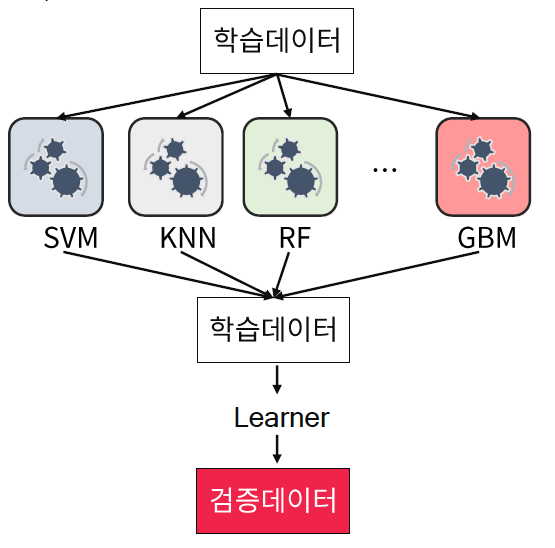
* ### Stacking  
    - 모델의 output 값을 새로운 독립변수로 사용
    - Meta Learner 라고 불리며, 다양한 모델을 결합하여 사용하는 기법  
    - 학습데이터로 부터 나오는 예측값을 가지고 <u>독립변수</u>로 사용 -> Learner를 통해 학습시킨다
      => Learner를 통해 나온 것에 대해 검증데이터로 예측 !  
    - 새로운 학습데이터를 다시 학습 시키고, 새로운 검증데이터를 통해 검증하는게 Stacking!  
    - Stacking의 과정은 Fast Campust PPT 참고!

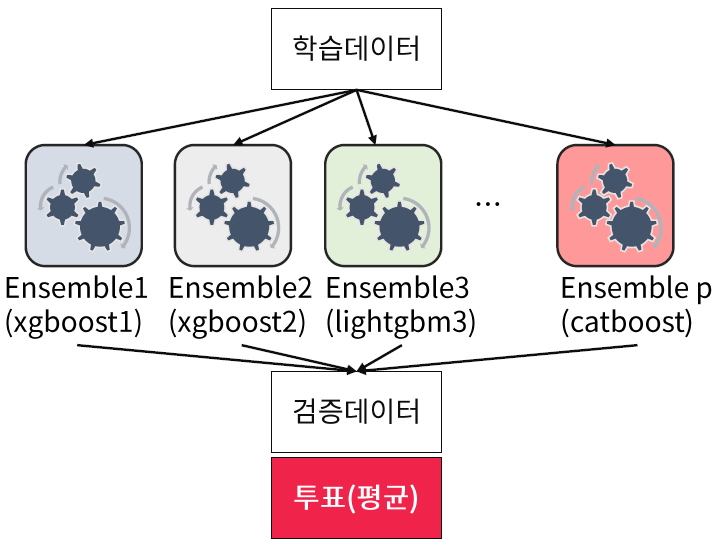
* ### Ensemble의 Ensemble  
    - Ensemble 모델을 단일 모델(base learner)로 사용하자  
    - Boosting 계열 알고리즘들은 hyper-parameter에 민감한 경향이 있다 => Ensemble의 Ensemble은 덜 민감하게 사용 가능  
    - Bagging, Random Forest와 같이 <u>데이터 및 변수 random 추출</u>  
    - 일반적으로 단일 Ensemble 모델에 비해 성능이 좋다